<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт,-знакомство-с-данными." data-toc-modified-id="Импорт,-знакомство-с-данными.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт, знакомство с данными.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайное-дерево" data-toc-modified-id="Случайное-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайное дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Общий-вывод-по-работе-с-несбалансированной-выборкой" data-toc-modified-id="Общий-вывод-по-работе-с-несбалансированной-выборкой-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Общий вывод по работе с несбалансированной выборкой</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Апсэмплинг" data-toc-modified-id="Апсэмплинг-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Апсэмплинг</a></span></li><li><span><a href="#Даунсэмплинг" data-toc-modified-id="Даунсэмплинг-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Даунсэмплинг</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Изменение-порога-+-апсэмплинг" data-toc-modified-id="Изменение-порога-+-апсэмплинг-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога + апсэмплинг</a></span></li><li><span><a href="#Изменение-порога-+-даунсэмплинг" data-toc-modified-id="Изменение-порога-+-даунсэмплинг-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Изменение порога + даунсэмплинг</a></span></li><li><span><a href="#Общий-вывод-по-борьбе-с-дисбалансом" data-toc-modified-id="Общий-вывод-по-борьбе-с-дисбалансом-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Общий вывод по борьбе с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**План исследования:**  
* Ознакомиться с данными
* Осуществить предобработку данных
* Разбить данные на выборки (Обучающая, валидационная, тестовая)
* Оценить эффективность разных моделей на несбалансированной выборке
* Сбалансировать выборку различными способами (апсэмплинг, даунсэмплинг, изменение порогового значения)
* Подбор оптимальной модели (метод, гиперпараметры)
* Проверить модели с наилучшими гиперпараметрами на тестовой выборке

## Подготовка данных

### Импорт, знакомство с данными.

Импортируем библиотеки и функции, взглянем на данные.

In [32]:
import time
from tqdm.auto import tqdm 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Из сопровождающих данных известно: 

* **RowNumber** — индекс строки в данных
* **CustomerId** — уникальный идентификатор клиента
* **Surname** — фамилия
* **CreditScore** — кредитный рейтинг
* **Geography** — страна проживания
* **Gender** — пол
* **Age** — возраст
* **Tenure** — сколько лет человек является клиентом банка
* **Balance** — баланс на счёте
* **NumOfProducts** — количество продуктов банка, используемых клиентом
* **HasCrCard** — наличие кредитной карты
* **IsActiveMember** — активность клиента
* **EstimatedSalary** — предполагаемая зарплата
* **Exited** — факт ухода клиента

Целевой признак - ***Excited***.

Для начала переименуем столбцы датафрейма.

In [3]:
def change_column_names(df):
    
    orig_columns_list = df.columns.tolist()
    new_columns_list = []
    
    for column_name in orig_columns_list:
        new_column_name=""
        new_column_name+=column_name[0].lower()
        for i in range(1,len(column_name)):
            if(column_name[i].isupper()):
                new_column_name+="_"+column_name[i].lower()
            else:
                new_column_name+=column_name[i]
        new_columns_list.append(new_column_name)
        
    rename_dict = {}    
    for i in range(len(orig_columns_list)):
        rename_dict[orig_columns_list[i]] = new_columns_list[i]
    return rename_dict

In [4]:
df = df.rename(columns = change_column_names(df))
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [5]:
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

**Выводы:**  
* Одна строка - один пользователь
* Целевой параметр - exited
* Доля покинувших банк клиентов - ~20%. Выборка несбалансирована.
* Содержатся пропуски в столбце tenure.

### Предобработка данных

Данные в столбцах 'row_number', 'customer_id', 'surname' нам не потребуются -  отбросим лишние колонки.

In [6]:
df = df.drop(columns = ['row_number', 'customer_id', 'surname'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Проверим данные на дубликаты.

In [7]:
df.duplicated().sum()

0

Теперь поработаем со столбцом tenure. Во-первых, ознакомимся с пропусками, во-вторых, определимся, можем ли мы сконвертировать эти данные в целочисленные

In [8]:
df[df['tenure'].isna() == True].head(15)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [9]:
df[df['tenure'].isna() == True]['exited'].value_counts(normalize = True)

0    0.79868
1    0.20132
Name: exited, dtype: float64

In [10]:
df.corr()['tenure']

credit_score       -0.000062
age                -0.013134
tenure              1.000000
balance            -0.007911
num_of_products     0.011979
has_cr_card         0.027232
is_active_member   -0.032178
estimated_salary    0.010520
exited             -0.016761
Name: tenure, dtype: float64

У нас нет возможности восстановить эти данные из каких-либо других данных, содержащихся в датафрейме: нет ни одного параметра с сильной корреляцией.

Доля покинувших банк клиентов, о которых нет информации в исследуемом столбце, сопоставима с долей по всему датафрейму. 

Мы можем спокойно их отбросить, либо заполнить медианным значением. Выберем второй подход - он наиболее деликатен к реальности.
Заодно сконвертируем данные в соответствующий тип.

In [11]:
df.loc[df['tenure'].isna() == True,'tenure'] = \
df.loc[df['tenure'].isna() == False,'tenure'].median()

df['tenure'] = df['tenure'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Быстро и непристально оглядим данные на предмет выбросов.

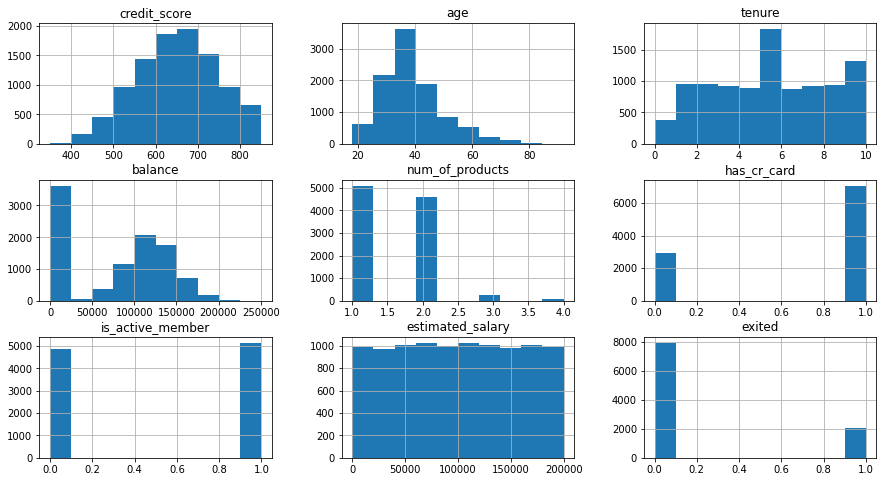

In [12]:
df.hist(figsize = (15,8));

За счёт заполнения пропусков в tenure медианным значением основная масса клиентов сконцентрировалась в этой области.  
Других аномалий не замечено. Приступим к подготовке данных к построению моделей: разбиение на выборки, OHE.

Разобью данные на  обучающую, валидационную и тестовую выборки в соотношении 3:1:1 со стратификацией по exited.
Сначала разделю датасет на параметры и целевой параметр, затем разобью каждый из наборов на выборки.

In [13]:
df_features = df.drop(columns = 'exited')
df_target = df['exited']
print(F"Features \n {df_features.head(3)} \n Target \n {df_target.head(3)}")

Features 
    credit_score geography  gender  age  tenure    balance  num_of_products  \
0           619    France  Female   42       2       0.00                1   
1           608     Spain  Female   41       1   83807.86                1   
2           502    France  Female   42       8  159660.80                3   

   has_cr_card  is_active_member  estimated_salary  
0            1                 1         101348.88  
1            0                 1         112542.58  
2            1                 0         113931.57   
 Target 
 0    1
1    0
2    1
Name: exited, dtype: int64


In [14]:
features_train, features_test, target_train, target_test = train_test_split(df_features,
                                                                df_target,     
                                                                test_size=0.2,
                                                                random_state=1234, 
                                                                stratify=df_target
                                                                           )

In [15]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train,
                                                                target_train,     
                                                                test_size=0.25,
                                                                random_state=1234, 
                                                                stratify=target_train
                                                                             )

In [16]:
categorial = df.select_dtypes('object').columns.tolist()
OHE = OneHotEncoder(drop = 'first', handle_unknown='ignore')

In [17]:
def OHE_apply(df_name):
    
    data = eval(df_name)
    if df_name == 'features_train':
        features_transformed = OHE.fit_transform(data[categorial]).toarray()
    else:
        features_transformed = OHE.transform(data[categorial]).toarray()
        
    data[OHE.get_feature_names_out().tolist()] = features_transformed
    
    data = data.drop(columns = categorial)
    
    print(f"Columns in {df_name}:")
    print(data.columns.tolist())
    
    return data

In [18]:
features_train = OHE_apply('features_train')
features_valid = OHE_apply('features_valid')
features_test = OHE_apply('features_test')

Columns in features_train:
['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'geography_Germany', 'geography_Spain', 'gender_Male']
Columns in features_valid:
['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'geography_Germany', 'geography_Spain', 'gender_Male']
Columns in features_test:
['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'geography_Germany', 'geography_Spain', 'gender_Male']


Проверю размеры выборок:

In [19]:
sample_list = ['train','valid','test']
split_list = ['features', 'target']

for sample in sample_list:
    for split in split_list:
        print (f'Length of {split}_{sample}:', len(eval(''.join([split,'_',sample]))),'\n')

Length of features_train: 6000 

Length of target_train: 6000 

Length of features_valid: 2000 

Length of target_valid: 2000 

Length of features_test: 2000 

Length of target_test: 2000 



Разделение прошло успешно! Осталось стандартизовать численные параметры.

In [21]:
numeric_features = features_train.select_dtypes(exclude = 'object').columns.tolist()

scaler = StandardScaler()
scaler.fit(features_train[numeric_features]) 
features_train[numeric_features] = scaler.transform(features_train[numeric_features])
features_valid[numeric_features] = scaler.transform(features_valid[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])

Теперь данные готовы к построению моделей на несбалансированных выборках.

## Исследование задачи

Для начала определим функцию построения ROC-кривой и подсчета площади под ней.

In [22]:
def auc_roc_curve_plot (model, features_valid = features_valid, target_valid = target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')# - ROC-curve
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel ("True Positive Rate")
    plt.title ('ROC-curve')
    plt.figtext (s = f"AUC-ROC = {roc_auc_score(target_valid, probabilities_one_valid):,.4}",\
                 x = 0.5, y = 0.2)
    plt.show()

### Логистическая регрессия

Используем для построения модели метод логистической регрессии. Выведем значения всех ключевых метрик, построим ROC-кривую, вычислим AUC-ROC.

In [24]:
model_log = LogisticRegression(random_state = 1234, solver = 'liblinear')
model_log.fit(features_train,target_train)
predictions = model_log.predict(features_valid)

pd.DataFrame(classification_report(target_valid, predictions,\
                                   target_names=['no exit', 'exit'], output_dict=True))

,no exit,exit,accuracy,macro avg,weighted avg
precision,0.828863,0.654412,0.817,0.741637,0.793275
recall,0.970477,0.218137,0.817,0.594307,0.817000
f1-score,0.894097,0.327206,0.817,0.610652,0.778451
support,1592.000000,408.000000,0.817,2000.000000,2000.000000


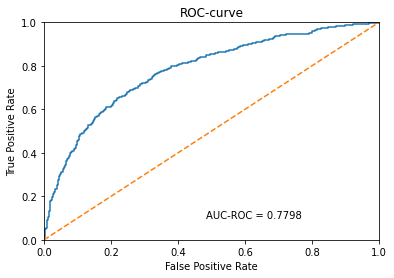

In [25]:
auc_roc_curve_plot(model_log)

**Выводы:**  
* F1-score для этой модели - 0,327. Ниже целевого 0,59.
* Площадь под кривой ROC - 0,7798.

Качество модели неудовлетворительно.

### Случайное дерево

In [26]:
model = DecisionTreeClassifier()

parametrs = {'max_depth': range (1,16),
             'random_state': [1234]}

grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
grid.fit(features_train, target_train)
tree_params = grid.best_params_

model_tree = DecisionTreeClassifier(max_depth = tree_params['max_depth'],\
                               random_state =tree_params['random_state'])
model_tree.fit(features_train, target_train)
predictions = model_tree.predict(features_valid)

print(f"Depth = {grid.best_params_['max_depth']}")
pd.DataFrame(classification_report(target_valid, predictions,\
                                   target_names=['no exit', 'exit'], output_dict=True))

Depth = 5


,no exit,exit,accuracy,macro avg,weighted avg
precision,0.870912,0.712062,0.8505,0.791487,0.838507
recall,0.953518,0.448529,0.8505,0.701023,0.850500
f1-score,0.910345,0.550376,0.8505,0.730360,0.836911
support,1592.000000,408.000000,0.8505,2000.000000,2000.000000


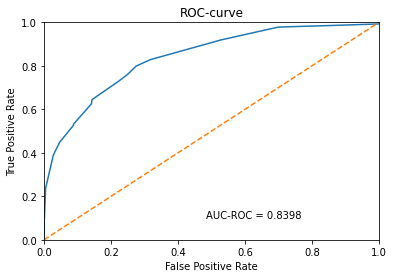

In [29]:
auc_roc_curve_plot(model_tree)

**Выводы:**  
* F1-score для этой модели - 0,55. Ниже целевого 0,59, выше, чем у логистической регрессии
* Модель менее склонна к ложноотрицательной ошибке. 
* Площадь под кривой ROC - 0,8398.

Качество модели неудовлетворительно, в сравнении с предыдущей эта модель более убедительна, но всё ещё недостаточно точна.

### Случайный лес

In [30]:
model = RandomForestClassifier()

parametrs = {'n_estimators': range (25,36),
             'max_depth': range (14,19),
             'random_state': [1234]}
#Последовательно n_estimators: (5,100,5) -> (25,36),max_depth': range (11,21,2) -> (14,19)
grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
grid.fit(features_train, target_train)
forest_params = grid.best_params_

model_forest = RandomForestClassifier(n_estimators = forest_params['n_estimators'],\
                               max_depth = forest_params['max_depth'],\
                               random_state =forest_params['random_state'])

model_forest.fit(features_train, target_train)
predictions = model_forest.predict(features_valid)

print(f"No. of estimators = {forest_params['n_estimators']} , depth = {forest_params['max_depth']}")
pd.DataFrame(classification_report(target_valid, predictions,\
                                   target_names=['no exit', 'exit'], output_dict=True))

No. of estimators = 35 , depth = 15


,no exit,exit,accuracy,macro avg,weighted avg
precision,0.868287,0.757576,0.8555,0.812931,0.845702
recall,0.964824,0.428922,0.8555,0.696873,0.855500
f1-score,0.914014,0.547731,0.8555,0.730872,0.839292
support,1592.000000,408.000000,0.8555,2000.000000,2000.000000


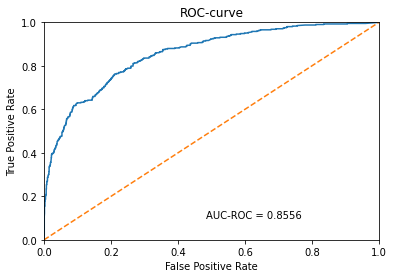

In [31]:
auc_roc_curve_plot(model_forest)

**Выводы:**  
* F1-score для этой модели - 0,548. Ниже целевого 0,59, ниже, чем у случайного дерева.
* Модель склонна к ложноотрицательной ошибке. 
* Площадь под кривой ROC - 0,8556, максимальная из трех методов.

Качество модели всё ещё неудовлетворительно, модель - наиболее точная из трёх.

### Общий вывод по работе с несбалансированной выборкой
* Наиболее точная из трёх моделей - модель случайного дерева (F1-score = 0,548, AUC-ROC = 0,8556)
* Для улучшения модели требуется устранение дисбаланса.

## Борьба с дисбалансом

Для начала упрощу себе жизнь: для каждого метода устранения дисбаланса в выборке буду строить сразу все три модели. Для этого напишу функцию.

In [33]:
method_list=['log','tree','forest']

def multi_model(features_train, target_train, features_valid = features_valid, target_valid = target_valid):
    for method in tqdm(method_list):
        if method == 'log':
            model = LogisticRegression(random_state = 1234, solver = 'liblinear')
        elif method == 'tree':
            model = DecisionTreeClassifier()
            parametrs = {'max_depth': range (2,21),
                         'random_state': [1234]}
            grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
            grid.fit(features_train, target_train)
            model = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'],\
                               random_state =grid.best_params_['random_state'])
            tree_params = grid.best_params_
        elif method == 'forest':
            model = RandomForestClassifier()
            parametrs = {'n_estimators': range (10,50,5),
                         'max_depth': range(2,11),
                         'random_state': [1234]}
            grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
            grid.fit(features_train, target_train)
            model = RandomForestClassifier(n_estimators = grid.best_params_['n_estimators'],\
                               max_depth = grid.best_params_['max_depth'],\
                               random_state =grid.best_params_['random_state'])
            forest_params = grid.best_params_
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        print (method)
        print (pd.DataFrame(classification_report(target_valid, predictions,\
                                   target_names=['no exit', 'exit'], output_dict=True)))
        auc_roc_curve_plot(model)
    print(f'Tree best parameters: {tree_params}')
    print(f'Forest best parameters: {forest_params}')     

### Апсэмплинг

Объявим функцию апсэмплинга:

In [34]:
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = int(round(1/(len(features_ones)/len(features_zeros))))

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1234)
    
    return features_upsampled, target_upsampled

Применим её на нашей тренировочной выборке

In [35]:
features_train_up, target_train_up = upsample(features_train, target_train)
print(features_train_up.shape)
target_train_up.shape

(9666, 11)


(9666,)

Обучим модели на новых выборках. 

  0%|          | 0/3 [00:00<?, ?it/s]

log
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.906447    0.396978     0.721     0.651712      0.802515
recall        0.724246    0.708333     0.721     0.716290      0.721000
f1-score      0.805168    0.508803     0.721     0.656985      0.744709
support    1592.000000  408.000000     0.721  2000.000000   2000.000000


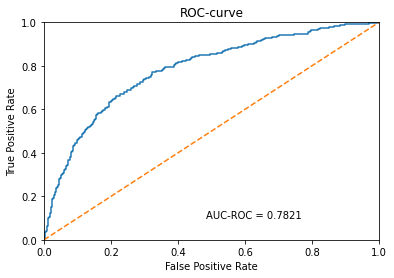

tree
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.861323    0.443925     0.772     0.652624      0.776174
recall        0.850503    0.465686     0.772     0.658094      0.772000
f1-score      0.855879    0.454545     0.772     0.655212      0.774007
support    1592.000000  408.000000     0.772  2000.000000   2000.000000


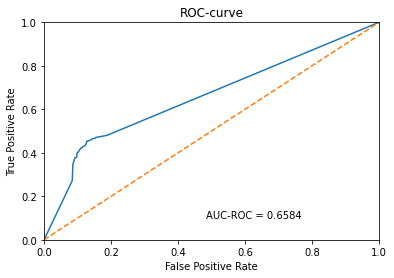

forest
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.910098    0.580645    0.8335     0.745371      0.842889
recall        0.877513    0.661765    0.8335     0.769639      0.833500
f1-score      0.893508    0.618557    0.8335     0.756032      0.837418
support    1592.000000  408.000000    0.8335  2000.000000   2000.000000


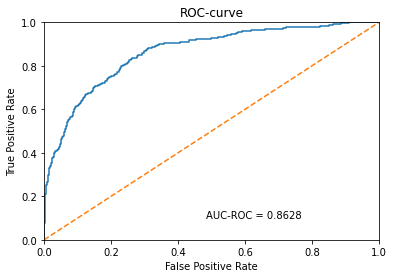

Tree best parameters: {'max_depth': 15, 'random_state': 1234}
Forest best parameters: {'max_depth': 10, 'n_estimators': 40, 'random_state': 1234}


In [36]:
multi_model (features_train_up, target_train_up )

**Выводы:**  
* F1-score и Recall улучшились для случайного леса и логистической регрессии.
* Ухудшилась precision для случайного дерева и случайного леса
* Площадь под кривой ROC заметно упала для случайного дерева
* Модель случайного леса показала f1-score выше целевого: 0,619 > 0.59 - потенциально берём в дальнейшее исследование.

### Даунсэмплинг

Объявим функцию даунсэмплинга:

In [37]:
def downsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    fraction = len(features_ones)/len(features_zeros)

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1234)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1234)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1234)
    
    return features_downsampled, target_downsampled

Применим её на нашей тренировочной выборке

In [38]:
features_train_down, target_train_down = downsample(features_train, target_train)
print(features_train_down.shape)
target_train_down.shape

(2444, 11)


(2444,)

Обучим модели на новых выборках. 

  0%|          | 0/3 [00:00<?, ?it/s]

log
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.904429    0.399719    0.7245     0.652074      0.801468
recall        0.731156    0.698529    0.7245     0.714843      0.724500
f1-score      0.808614    0.508475    0.7245     0.658544      0.747386
support    1592.000000  408.000000    0.7245  2000.000000   2000.000000


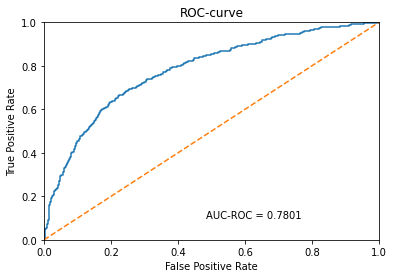

tree
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.925781    0.434722     0.749     0.680252      0.825605
recall        0.744347    0.767157     0.749     0.755752      0.749000
f1-score      0.825209    0.554965     0.749     0.690087      0.770079
support    1592.000000  408.000000     0.749  2000.000000   2000.000000


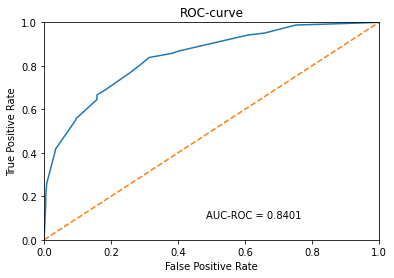

forest
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.931507    0.510604    0.8025     0.721055      0.845643
recall        0.811558    0.767157    0.8025     0.789357      0.802500
f1-score      0.867405    0.613124    0.8025     0.740265      0.815532
support    1592.000000  408.000000    0.8025  2000.000000   2000.000000


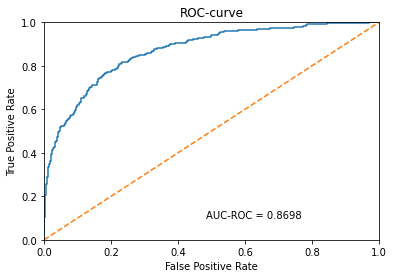

Tree best parameters: {'max_depth': 5, 'random_state': 1234}
Forest best parameters: {'max_depth': 10, 'n_estimators': 45, 'random_state': 1234}


In [39]:
multi_model (features_train_down, target_train_down)

**Выводы:**  
* F1-score для случайного дерева заметно вырос.
* У всех моделей случайного леса и случаного дерева сильно упала precision - они склонны к ложноотрицательной ошибке.
* Площадь под кривой ROC максимальна из всех имплементаций случайного дерева и случайного леса.
* Модель случайного леса показала f1-score выше целевого: 0,613 > 0.59, но меньший, чем в случае апсэмплинга (0,619). Считаем пригодной для дальнейшего исследования.

### Изменение порога

Создадим функцию подбора порога.

In [41]:
def threshold_move (model, features_valid = features_valid, target_valid = target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    f1_best = 0
    predicted_best = []
    threshold_best = 0
    
    for threshold in np.arange(0, 1.01, 0.02):
        predicted_valid = probabilities_one_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > f1_best:
            f1_best = f1
            predicted_best = predicted_valid
            threshold_best = threshold
    return predicted_best, threshold_best      

Применим её на всех наших моделях.

log , threshold = 0.26
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.886856    0.459924     0.775     0.673390      0.799762
recall        0.822236    0.590686     0.775     0.706461      0.775000
f1-score      0.853325    0.517167     0.775     0.685246      0.784749
support    1592.000000  408.000000     0.775  2000.000000   2000.000000


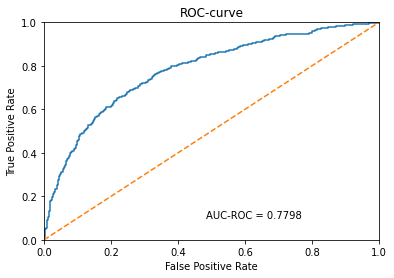

tree , threshold = 0.24
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.903910    0.535642    0.8135     0.719776      0.828783
recall        0.856784    0.644608    0.8135     0.750696      0.813500
f1-score      0.879716    0.585095    0.8135     0.732405      0.819613
support    1592.000000  408.000000    0.8135  2000.000000   2000.000000


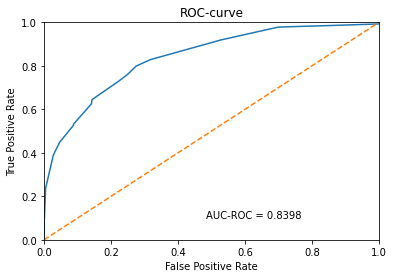

forest , threshold = 0.32
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.902317    0.625310    0.8465     0.763814      0.845807
recall        0.905151    0.617647    0.8465     0.761399      0.846500
f1-score      0.903732    0.621455    0.8465     0.762593      0.846147
support    1592.000000  408.000000    0.8465  2000.000000   2000.000000


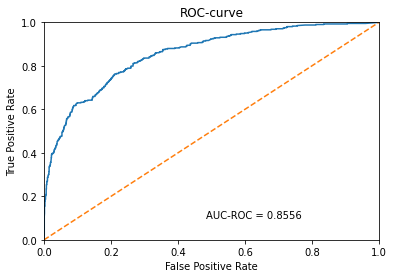

In [42]:
for method in method_list:
    model = eval("".join(['model_',method]))
    model.fit(features_train, target_train)
    predicted_best, threshold = threshold_move(model)
    print (method, f', threshold = {threshold}')
    print (pd.DataFrame(classification_report(target_valid, predicted_best,\
                                              target_names=['no exit', 'exit'], output_dict=True)))
    auc_roc_curve_plot(model)

**Выводы:**  
* F1-score максимальный для каждой из моделей.
* Площадь под кривой ROC идентична несбалансированной выборке - т.к. модель обучалась на ней же.
* Модель случайного леса с измененным порогом показала максимальный до сих пор f1-score: 0,621 - приемлема для дальнейшего исследования.

### Изменение порога + апсэмплинг

Попробуем скомбинировать подходы. Для начала попробуем обучить модели на увеличенной выборке без перебора гиперпараметров.

log , threshold = 0.56
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.895804    0.454386      0.77     0.675095      0.805755
recall        0.804648    0.634804      0.77     0.719726      0.770000
f1-score      0.847783    0.529652      0.77     0.688718      0.782884
support    1592.000000  408.000000      0.77  2000.000000   2000.000000


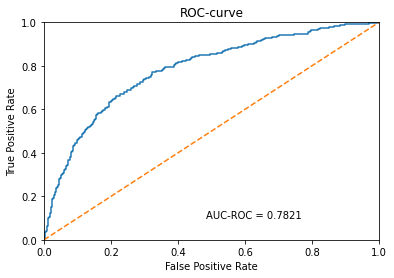

tree , threshold = 0.54
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.901575    0.542017     0.816     0.721796      0.828225
recall        0.863065    0.632353     0.816     0.747709      0.816000
f1-score      0.881900    0.583710     0.816     0.732805      0.821069
support    1592.000000  408.000000     0.816  2000.000000   2000.000000


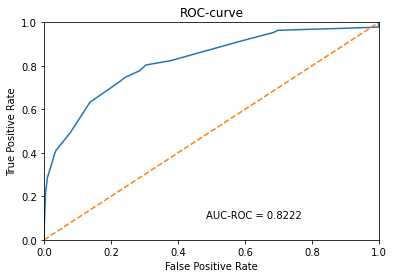

forest , threshold = 0.48
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.890587    0.629121     0.843     0.759854      0.837248
recall        0.915201    0.561275     0.843     0.738238      0.843000
f1-score      0.902726    0.593264     0.843     0.747995      0.839596
support    1592.000000  408.000000     0.843  2000.000000   2000.000000


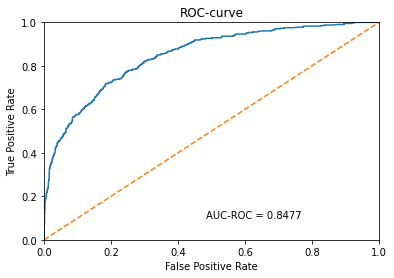

In [44]:
for method in method_list:
    model = eval("".join(['model_',method]))
    model.fit(features_train_up, target_train_up)
    predicted_best, threshold = threshold_move(model)
    print (method, f', threshold = {threshold}')
    print (pd.DataFrame(classification_report(target_valid, predicted_best,\
                                              target_names=['no exit', 'exit'], output_dict=True)))
    auc_roc_curve_plot(model)

Затем объявим функцию для перебора гиперпараметров с подбором порога.

In [45]:
def multi_model_threshold(features_train, target_train, features_valid = features_valid, target_valid = target_valid):
    for method in method_list:
        if method == 'log':
            model = LogisticRegression(random_state = 1234, solver = 'liblinear')
        elif method == 'tree':
            model = DecisionTreeClassifier()
            parametrs = {'max_depth': range (2,21),
                         'random_state': [1234]}
            grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
            grid.fit(features_train, target_train)
            model = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'],\
                               random_state =grid.best_params_['random_state'])
            tree_params = grid.best_params_
        elif method == 'forest':
            model = RandomForestClassifier()
            parametrs = {'n_estimators': range (10,50,5),
                         'max_depth': range(2,11),
                         'random_state': [1234]}
            grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
            grid.fit(features_train, target_train)
            model = RandomForestClassifier(n_estimators = grid.best_params_['n_estimators'],\
                               max_depth = grid.best_params_['max_depth'],\
                               random_state =grid.best_params_['random_state'])
            forest_params = grid.best_params_
        model.fit(features_train, target_train)
        predictions, threshold = threshold_move(model)
        print (method, f', threshold = {threshold}')
        print (pd.DataFrame(classification_report(target_valid, predictions,\
                                   target_names=['no exit', 'exit'], output_dict=True)))
        auc_roc_curve_plot(model)
    print(f'Tree best parameters: {tree_params}')
    print(f'Forest best parameters: {forest_params}') 

Применим эту функцию на увеличенную выборку и посмотрим, как меняются метрики.

log , threshold = 0.56
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.895804    0.454386      0.77     0.675095      0.805755
recall        0.804648    0.634804      0.77     0.719726      0.770000
f1-score      0.847783    0.529652      0.77     0.688718      0.782884
support    1592.000000  408.000000      0.77  2000.000000   2000.000000


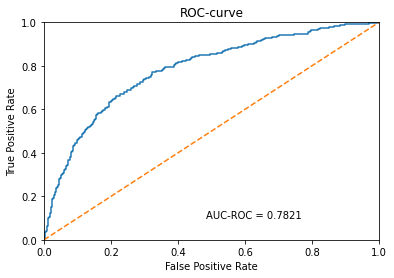

tree , threshold = 0.72
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.861577    0.475578    0.7865     0.668578      0.782833
recall        0.871859    0.453431    0.7865     0.662645      0.786500
f1-score      0.866687    0.464241    0.7865     0.665464      0.784588
support    1592.000000  408.000000    0.7865  2000.000000   2000.000000


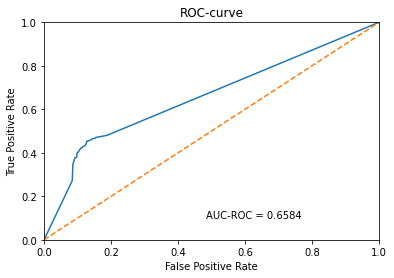

forest , threshold = 0.54
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.901691    0.622829    0.8455     0.762260      0.844803
recall        0.904523    0.615196    0.8455     0.759859      0.845500
f1-score      0.903104    0.618989    0.8455     0.761047      0.845145
support    1592.000000  408.000000    0.8455  2000.000000   2000.000000


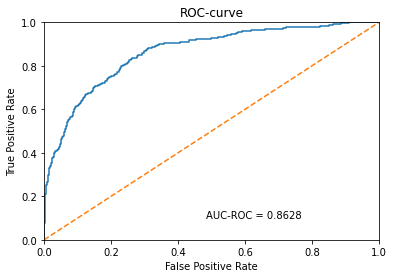

Tree best parameters: {'max_depth': 15, 'random_state': 1234}
Forest best parameters: {'max_depth': 10, 'n_estimators': 40, 'random_state': 1234}


In [46]:
multi_model_threshold (features_train_up, target_train_up)

**Выводы:**  
* Модели линейной регрессии ожидаемо идентичны.
* Ни одна из двух моделей случайного дерева не пробила минимальный порог f1-скоринга
* Модель случайного леса показала приемлемый результат в обоих случаях, на увеличенной выборке c подбором гиперпараметров показала максимальный из двух f1-score: 0,619 - приемлема для дальнейшего исследования.

### Изменение порога + даунсэмплинг

Аналогично поступим и с уменьшенной выборкой.

log , threshold = 0.58
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.888070    0.474409     0.783     0.681240      0.803683
recall        0.832286    0.590686     0.783     0.711486      0.783000
f1-score      0.859274    0.526201     0.783     0.692737      0.791327
support    1592.000000  408.000000     0.783  2000.000000   2000.000000


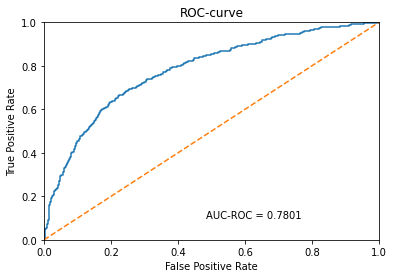

tree , threshold = 0.56
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.907859    0.519084     0.806     0.713472      0.828549
recall        0.841709    0.666667     0.806     0.754188      0.806000
f1-score      0.873533    0.583691     0.806     0.728612      0.814405
support    1592.000000  408.000000     0.806  2000.000000   2000.000000


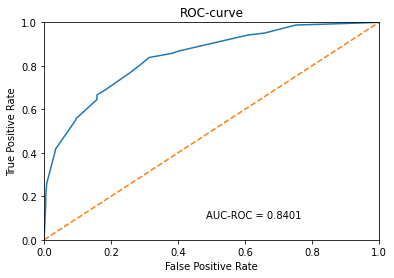

forest , threshold = 0.68
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.888554    0.655882     0.849     0.772218      0.841089
recall        0.926508    0.546569     0.849     0.736538      0.849000
f1-score      0.907134    0.596257     0.849     0.751695      0.843715
support    1592.000000  408.000000     0.849  2000.000000   2000.000000


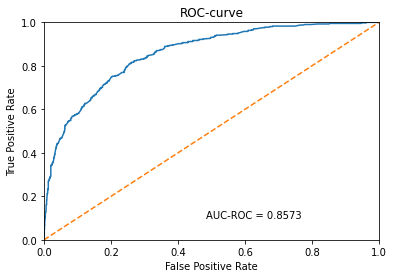

In [47]:
for method in method_list:
    model = eval("".join(['model_',method]))
    model.fit(features_train_down, target_train_down)
    predicted_best, threshold = threshold_move(model)
    print (method, f', threshold = {threshold}')
    print (pd.DataFrame(classification_report(target_valid, predicted_best,\
                                              target_names=['no exit', 'exit'], output_dict=True)))
    auc_roc_curve_plot(model)

Теперь переберём гиперпараметры у случайного дерева и случайного леса.

log , threshold = 0.58
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.888070    0.474409     0.783     0.681240      0.803683
recall        0.832286    0.590686     0.783     0.711486      0.783000
f1-score      0.859274    0.526201     0.783     0.692737      0.791327
support    1592.000000  408.000000     0.783  2000.000000   2000.000000


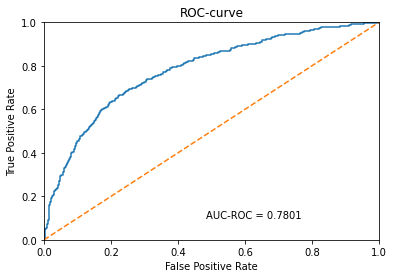

tree , threshold = 0.56
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.907859    0.519084     0.806     0.713472      0.828549
recall        0.841709    0.666667     0.806     0.754188      0.806000
f1-score      0.873533    0.583691     0.806     0.728612      0.814405
support    1592.000000  408.000000     0.806  2000.000000   2000.000000


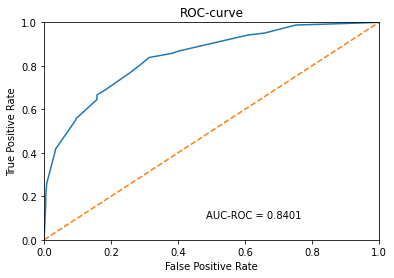

forest , threshold = 0.56
               no exit        exit  accuracy    macro avg  weighted avg
precision     0.918846    0.563851    0.8285     0.741349      0.846427
recall        0.860553    0.703431    0.8285     0.781992      0.828500
f1-score      0.888745    0.625954    0.8285     0.757349      0.835135
support    1592.000000  408.000000    0.8285  2000.000000   2000.000000


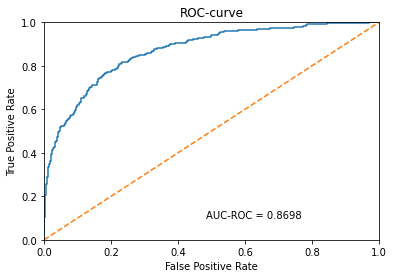

Tree best parameters: {'max_depth': 5, 'random_state': 1234}
Forest best parameters: {'max_depth': 10, 'n_estimators': 45, 'random_state': 1234}


In [48]:
multi_model_threshold (features_train_down, target_train_down)

**Выводы:**  
* Модели линейной регрессии вновь ожидаемо идентичны.
* Ни одна из двух моделей случайного дерева не пробила минимальный порог f1-скоринга, в сравнении с апсэмплингом + изменением порога показывают лучший результат.
* Модель случайного леса показала приемлемый результат в обоих случаях, на увеличенной выборке и с подбором гиперпараметров показала максимальный из всех исследований f1-score: 0,626 - приоритетна для дальнейшего исследования.
* Модели склонны к ложноотрицательным ошибкам.

### Общий вывод по борьбе с дисбалансом

* Протестировано 5 подходов к борьбе с дисбалансом.
* Определены модели, пригодные для тестирования на тестовой выборке, зафиксированы их параметры:
  - Модель случайного леса, обученная на увеличенной выборке
  - Модель случайного леса, обученная на уменьшенной выборке
  - Модель случайного леса с изменённым порогом чувствительности, обученная на стандартной выборке
  - Модель случайного леса с изменённым порогом чувствительности, обученная на увеличенной выборке
  - Модель случайного леса с изменённым порогом чувствительности, обученная на уменьшенной выборке

Остановим выбор на модели, показавшей наилучший результат.


## Тестирование модели

               no exit        exit  accuracy    macro avg  weighted avg
precision     0.910547    0.543825    0.8185     0.727186      0.835919
recall        0.856246    0.670762    0.8185     0.763504      0.818500
f1-score      0.882562    0.600660    0.8185     0.741611      0.825195
support    1593.000000  407.000000    0.8185  2000.000000   2000.000000


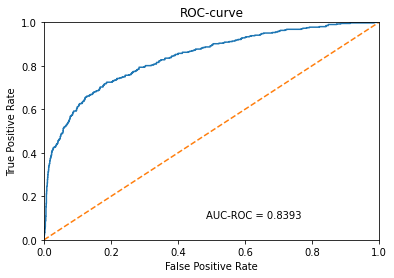

In [49]:
model = RandomForestClassifier(n_estimators =  45,\
                                max_depth = 10,\
                                random_state = 1234)
model.fit(features_train_down,target_train_down)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predictions = probabilities_one_test > 0.56
print (pd.DataFrame(classification_report(target_test, predictions,\
                                              target_names=['no exit', 'exit'], output_dict=True)))
auc_roc_curve_plot(model, features_test, target_test)

**Выводы:**
- Модель прошла тестирование, но погранично
- Вдобавок, так, как она склонна к ложноотрицательной ошибке, и с точки зрения банковского бизнеса лучше попытаться сохранить клиента, который не очень-то собирался уходить, чем упустить из внимания того, кто планирует отказаться от услуг, имеет смысл отдельно исследовать прочие модели.

## Общий вывод:
* Была проведена предобработка данных: заполнение пропусков, изменение типов данных, OHE-преобразование, стандартизация.
* Данные были оценены и разбиты на выборки со стратификацией по целевому признаку.
* Были построены предиктивные модели разных видов с подбором оптимальных гиперпараметров на несбалансированной выборке.
* Были оценены различные способы борьбы с дисбалансом с помощью моделей разных видов с подбором оптимальных параметров
* Наилучшие комбинации методов моделирования и подходов к дисбалансу были проверены на тестовой выборке.  
Определен  подход - применять модель случайного леса:
  * с 45 эстиматорами
  * c наибольшей глубиной дерева = 10
  * обучениe на уменьшенной выборке
  * скоректированный порог чувствительности = 0.56.
  
* Метрики наилучшей модели: 
  * Precision = 0,544
  * Recall = 0,671
  * Accuracy = 0,819
  * F1-score = 0,601
  * AUC-ROC = 0,839